# Portfolio assignment week 6

## 1. Decision Trees and Naive bayes
The scikit-learn library provides different parameters for decision trees and naive bayes. 

Based on the last code example [in the accompanying notebook](../Exercises/E_DT_NB.ipynb), add several new models to the `classifiers` variable. These models should have different parameters. For instance, create a new decision tree with a max depth of 1. Another possibility is to add different datasets or add noise.

Try to understand why some models behave differently than others. Give arguments what influences model performance and why.

## 2. Decision Tree Evaluation
As shown in the [in the accompanying notebook](../Exercises/E_DT_NB.ipynb) it is possible to visualize the decision tree. 

For this exercise, you can use your own dataset if that is eligable for supervised classification. Otherwise, you can use the [breast cancer dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset) which you can find on assemblix2019 (`/data/datasets/DS3/`). Go through the data science pipeline as you've done before:

1. Try to understand the dataset globally.
2. Load the data.
3. Exploratory analysis
4. Preprocess data (skewness, normality, etc.)
5. Modeling (cross-validation and training)
6. Evaluation
7. **Explanation**

Explain how the decision tree behaves under certain circumstances. What features seem important and how are the decisions made?

## 3. Naive Bayes 

During the Corona pandemic, seven roommates in a student house did a Corona test. The table below show the data of these students: whether they experiences shivers, had a running nose, or had a headache. The test result is also shown.

Roommate | shivers | running nose | headache | test result
--|--|--|--|--
1 | Y | N | No | Negative
2 | N | N | Mild | Negative
3 | Y | Y | No | Positive
4 | N | Y | No | Negative
5 | N | N | Heavy | Positive
6 | Y | N | No | Negative
7 | Y | Y | Mild | Positive

Explain why it is not useful to include the column 'Roommate' in a classification procedure.

Train a [Categorical Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html) classifier on this dataset, where the Test Results are your classes and the other features the data. For this to work, you'll need [Pandas `get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to transform the nominal data into something that sklearn can work with. Use all seven rows in your training.

If you let your fitted classifier predict the test results (based on all the data), you will (hopefully) see that the prediction for observation number 5 (1-based) is wrong (it predicts Negative while the actual value is Positive). Show by manual calculation that the prediction for this instance is indeed higher ($p=0.527$) for the Negative class than for the Positive class.



In [58]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt


In [59]:
with open('config.yaml','r') as config_file:
    config = yaml.load(config_file, Loader=yaml.SafeLoader)

bc_data = pd.read_csv(config["breast_cancer_data"])

bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
# alterations to the dataframe, changing obj to str
bc_data.diagnosis = bc_data.diagnosis.astype(str)
# check the sample types
print(f'Unique types: {bc_data.diagnosis.unique()}')
# check missing values
print(f'missing values: {bc_data.isnull().values.sum()}')

Unique types: ['M' 'B']
missing values: 0


In [61]:
from sklearn.preprocessing import StandardScaler
# Data standardization
sc = StandardScaler()
scaled_data = sc.fit_transform(bc_data.iloc[:,2:])

In [62]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#split the data in test and train sets
X = scaled_data
y = bc_data.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

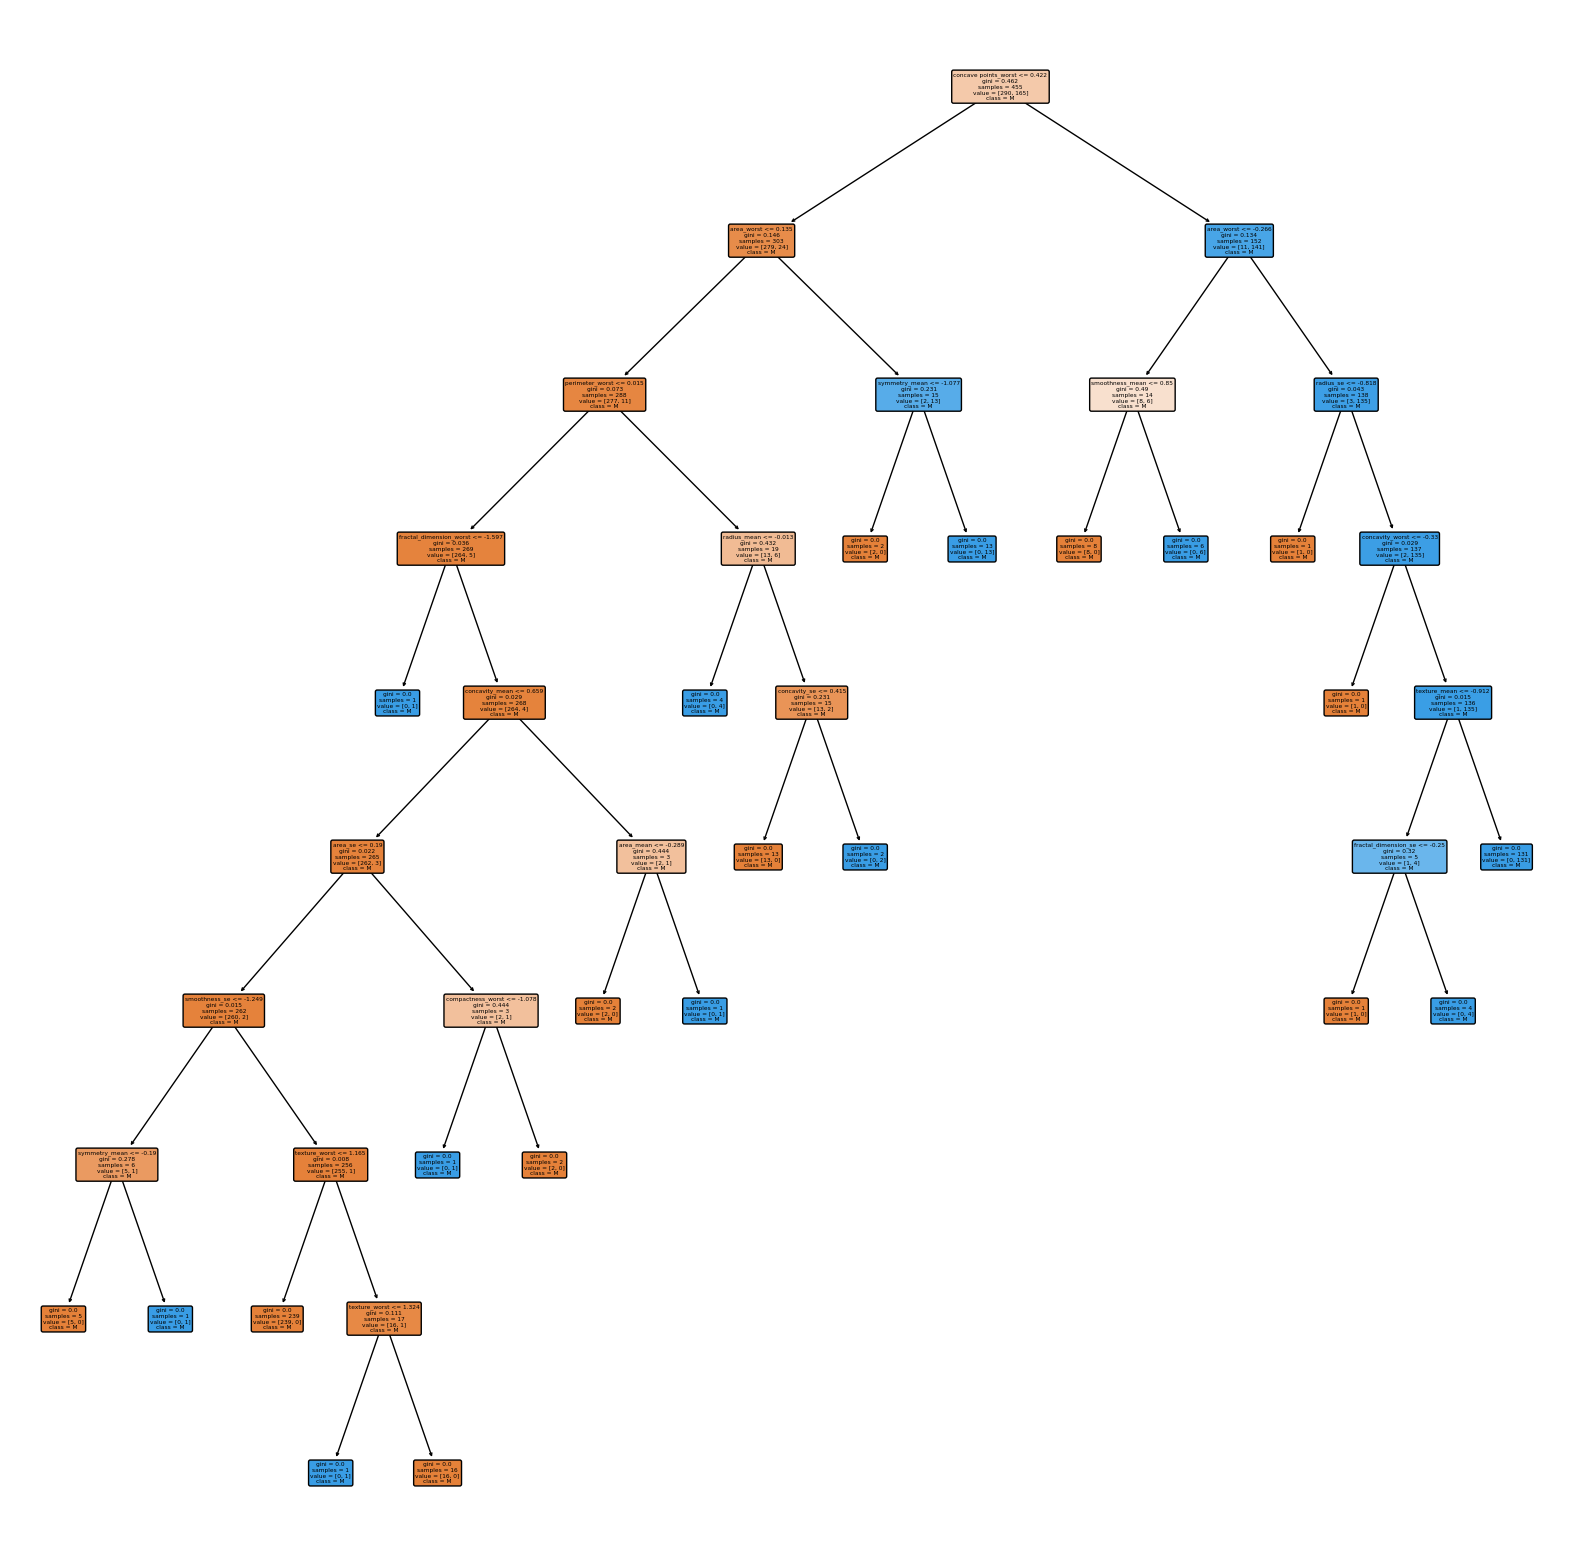

In [63]:
dt = tree.DecisionTreeClassifier()
nb = GaussianNB()
dt.fit(X_train, y_train)
nb.fit(X_train, y_train)

plt.figure(figsize=(20, 20))
tree.plot_tree(
    dt, 
    feature_names=bc_data.iloc[:,2:].columns, 
    class_names=bc_data.diagnosis,
    filled=True,
    rounded=True,
)
plt.show()

In [64]:
pred_dt = dt.predict(X_test)
pred_nb = nb.predict(X_test)


def get_score(pred_y):
    false_pred = 0
    for p,y in zip(pred_dt, pred_y):
        if p != y:
            false_pred += 1
    return 1 - false_pred / len(pred_y)

In [65]:
print(f'Accuracy dt = {get_score(pred_dt)}'
      f'\nAccuracy nb = {get_score(pred_nb):0.02}')

Accuracy dt = 1.0
Accuracy nb = 0.92
